In [87]:
import numpy as np
import pandas as pd



In [88]:
data = pd.read_csv("C:/Users/Shreetama/Desktop/data science learning/data zoomcamp/homework_2/AB_NYC_2019.csv")

In [89]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


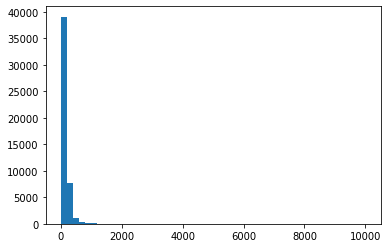

In [90]:
import matplotlib.pyplot as plt
plt.hist(data["price"], bins = 50)
plt.show()

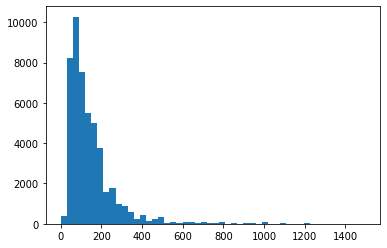

In [91]:
import matplotlib.pyplot as plt
plt.hist(data['price'][data['price']< 1500], bins = 50)
plt.show()

In [92]:
feature = data[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [93]:
feature.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [94]:
np.sum(feature.isna())

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [95]:
np.median(feature['minimum_nights'])

3.0

In [96]:
idx = np.arange(len(feature.index))
len(idx)

48895

In [97]:
0.6*len(idx)


29337.0

In [98]:
0.2*len(idx)

9779.0

In [99]:
0.6*len(idx)+2*0.2*len(idx)

48895.0

In [100]:
n_train = int(0.6*len(feature.index))
n_test = int(0.2*len(feature.index))
n_val = int(0.2*len(feature.index))

In [101]:
df_train = feature.iloc[n_train:]
df_val = feature.iloc[n_train:n_train + n_val]
df_test = feature.iloc[n_train + n_val:]

In [102]:
np.random.seed(42)
np.random.shuffle(idx)

In [103]:
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [104]:
df_train = feature.iloc[idx[n_train:]]
df_val = feature.iloc[idx[n_train:n_train + n_val]]
df_test = feature.iloc[idx[n_train + n_val:]]

In [106]:
np.log1p(df_train.price)

743      1.595709
36546    1.560500
16439    1.550446
37435    1.925822
11400    1.574565
           ...   
11284    1.631370
44732    1.696413
38158    1.770740
860      1.794635
15795    1.757132
Name: price, Length: 19558, dtype: float64

In [107]:
df_train_zero = df_train.fillna(0)
df_train_mean = df_train.fillna(np.mean(df_train.reviews_per_month))


In [108]:
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    W_full = XTX.inv.dot(X.T).dot(y)

In [111]:
X_train_zero = df_train_zero.drop(df_train['price'], axis = 1)

KeyError: '[3.9318256327243257 3.7612001156935624 3.713572066704308 ...\n 4.875197323201151 5.017279836814924 4.795790545596741] not found in axis'